#### Transformation is required for scaling down the scale of the points so that there isn't large difference between the vectors of the values which results in them taking less time. 

Normalisation and standardisation is not necessary for all algorithms

-->Normalisation and Standardization

-->Standardisation
1. Scaling to min and max values
2. Scaling to median and Quantiles

--> Gaussian Transformation
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Exponential Transformation
5. Box Cox Transformation

# Standardizations

# Standard Scaling

The aim is to bring all the features and variables to a similar scale. It also implies centering a variable at zero. 

This works in most situations

z=(x-xmean)/std

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['pclass','age','fare','survived'])
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [3]:
df['age'].fillna(df['age'].median(),inplace=True)

In [5]:
df.isnull().mean()

pclass      0.000000
age         0.000000
fare        0.001176
survived    0.000000
dtype: float64

In [6]:
df['fare'].fillna(df['fare'].median(),inplace=True)

In [7]:
df.isnull().mean()

pclass      0.0
age         0.0
fare        0.0
survived    0.0
dtype: float64

In [8]:
#For standardisation, standardscaler from sklearn is used

from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

# transform vs fit_transform(fit tansform is used when we apply the algorithm and also have to change the data,used for preprocessing)
# for ML algo.(test) usually, transform is used

df_scaled=scaler.fit_transform(df)

In [13]:
pd.DataFrame(df_scaled)

#These colums are analogous to the categories of above data

,0,1,2,3
0,0.811420,-0.093041,-0.489422,1.309830
1,0.811420,0.676701,-0.472102,-0.763458
2,0.811420,0.060908,-0.183408,-0.763458
3,-0.381845,1.908287,-0.204845,1.309830
4,-0.381845,0.830649,-0.391249,-0.763458
...,...,...,...,...
845,-1.575110,1.985261,0.298446,-0.763458
846,-1.575110,2.216184,-0.079954,-0.763458
847,-0.381845,-0.400937,-0.148924,1.309830
848,0.811420,-2.017394,-0.376802,-0.763458


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.23548527, -1.92823024, -1.62097522, -1.31372019, -1.00646517,
        -0.69921014, -0.39195511, -0.08470009,  0.22255494,  0.52980996,
         0.83706499,  1.14432002,  1.45157504,  1.75883007,  2.06608509,
         2.37334012,  2.68059515,  2.98785017,  3.2951052 ,  3.60236022,
         3.90961525]),
 <BarContainer object of 20 artists>)

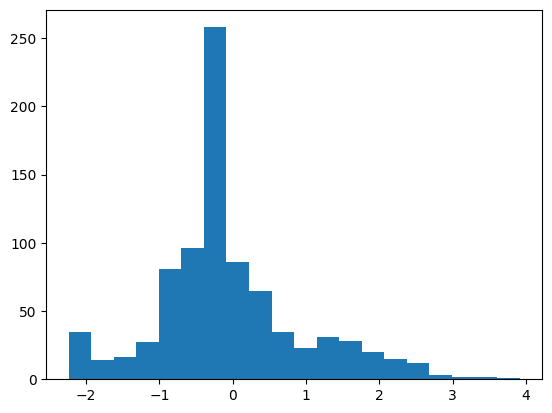

In [15]:
plt.hist(df_scaled[:,1],bins=20)

(array([537.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 313.]),
 array([-0.76345778, -0.65979339, -0.55612899, -0.4524646 , -0.3488002 ,
        -0.24513581, -0.14147141, -0.03780701,  0.06585738,  0.16952178,
         0.27318617,  0.37685057,  0.48051496,  0.58417936,  0.68784375,
         0.79150815,  0.89517254,  0.99883694,  1.10250133,  1.20616573,
         1.30983012]),
 <BarContainer object of 20 artists>)

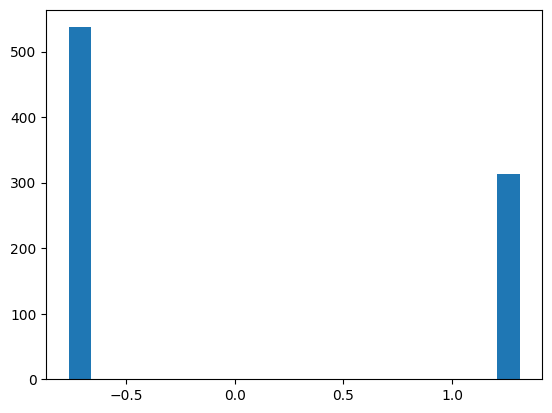

In [16]:
plt.hist(df_scaled[:,3],bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.63357408, -0.15607285,  0.32142839,  0.79892962,  1.27643086,
         1.75393209,  2.23143333,  2.70893456,  3.18643579,  3.66393703,
         4.14143826,  4.6189395 ,  5.09644073,  5.57394196,  6.0514432 ,
         6.52894443,  7.00644567,  7.4839469 ,  7.96144813,  8.43894937,
         8.9164506 ]),
 <BarContainer object of 20 artists>)

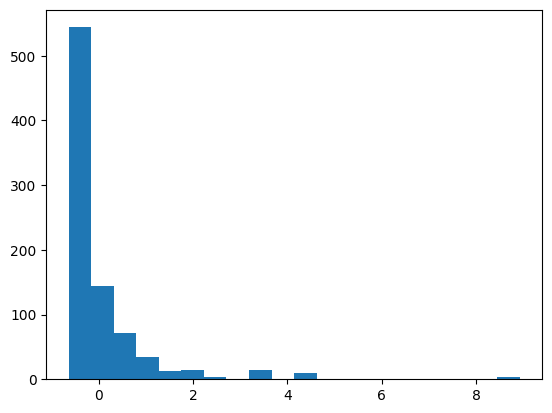

In [17]:
plt.hist(df_scaled[:,2],bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

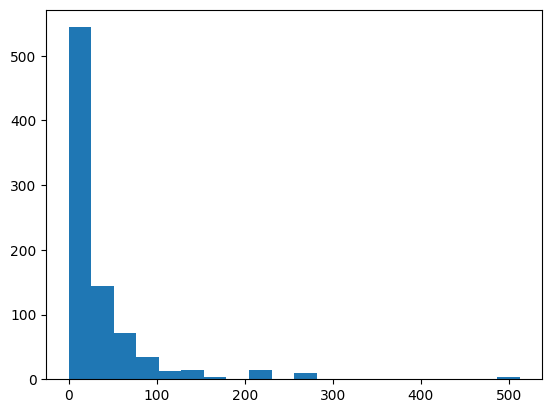

In [22]:
plt.hist(df['fare'],bins=20)

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-1.5751096 , -1.45578311, -1.33645663, -1.21713014, -1.09780366,
        -0.97847718, -0.85915069, -0.73982421, -0.62049772, -0.50117124,
        -0.38184475, -0.26251827, -0.14319178, -0.0238653 ,  0.09546119,
         0.21478767,  0.33411416,  0.45344064,  0.57276713,  0.69209361,
         0.8114201 ]),
 <BarContainer object of 20 artists>)

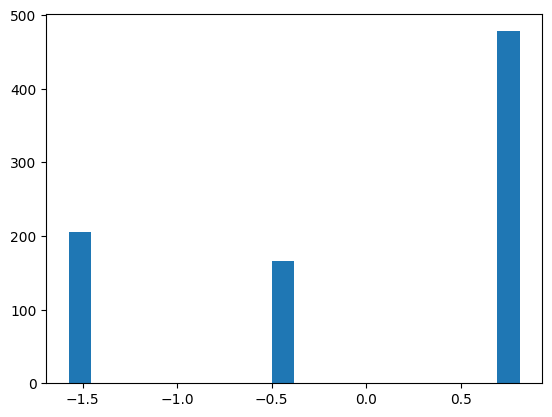

In [18]:
plt.hist(df_scaled[:,0],bins=20)

# Min Max Scaling

Min Max scaling scales the values between 0 to 1

X_scaled=(X-X.min)/(X.max-X.min)

In [23]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,pclass,age,fare,survived
0,1.0,0.348643,0.015094,1.0
1,1.0,0.473904,0.016908,0.0
2,1.0,0.373695,0.047138,0.0
3,0.5,0.674321,0.044893,1.0
4,0.5,0.498956,0.025374,0.0
...,...,...,...,...
845,0.0,0.686847,0.097594,0.0
846,0.0,0.724426,0.057971,0.0
847,0.5,0.298538,0.050749,1.0
848,1.0,0.035490,0.026887,0.0


(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

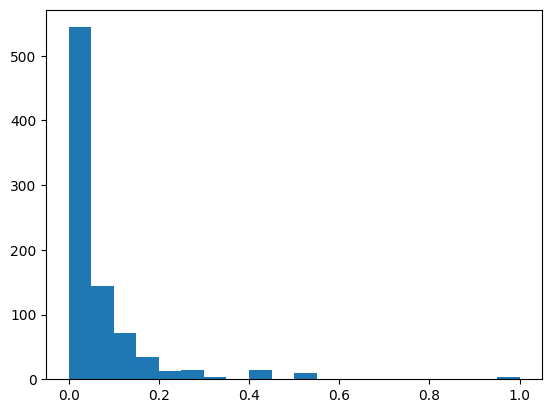

In [24]:
plt.hist(df_minmax['fare'],bins=20)

# Robust Scaler

It is used to scale the features to median and the quantiles(IQR). Outliers get skipped here i.e. more robust to the presence of outliers

In [25]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,pclass,age,fare,survived
0,0.0,0.000000,-0.276835,1.0
1,0.0,0.776699,-0.236484,0.0
2,0.0,0.155340,0.436062,0.0
3,-1.0,2.019417,0.386123,1.0
4,-1.0,0.932039,-0.048128,0.0


(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61265451,  0.49974314,  1.61214079,  2.72453845,  3.8369361 ,
         4.94933375,  6.0617314 ,  7.17412906,  8.28652671,  9.39892436,
        10.51132201, 11.62371966, 12.73611732, 13.84851497, 14.96091262,
        16.07331027, 17.18570793, 18.29810558, 19.41050323, 20.52290088,
        21.63529854]),
 <BarContainer object of 20 artists>)

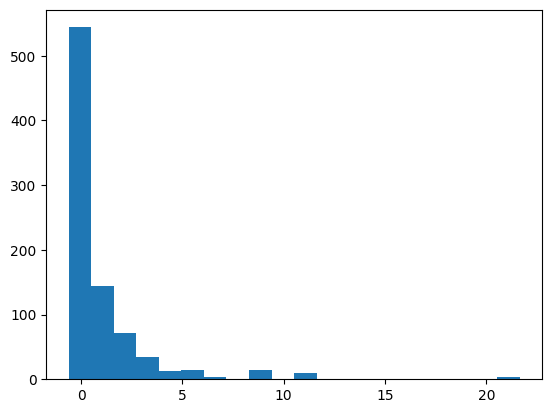

In [26]:
plt.hist(df_robust_scaler['fare'],bins=20)

# Gaussian Transformations

This is requiredn to convert a dataset to normally distributed dataset because some algorithms assume that data is normally distributed such as linear and logistic regression

improves
-accuracy
-performance

In [27]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])

In [28]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [31]:
df['age'].fillna(df['age'].median(),inplace=True)

In [34]:
df['fare'].fillna(df['fare'].median(),inplace=True)

In [35]:
df.isnull().mean()

age         0.0
fare        0.0
survived    0.0
dtype: float64

In [ ]:
#### If you want to check whether a feature is gaussian or normal distributed, use Q-Q plot

In [40]:
import scipy.stats as stat
import pylab

In [41]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
    ##For Quantile-Quantile plot,scipy library is required to be imported

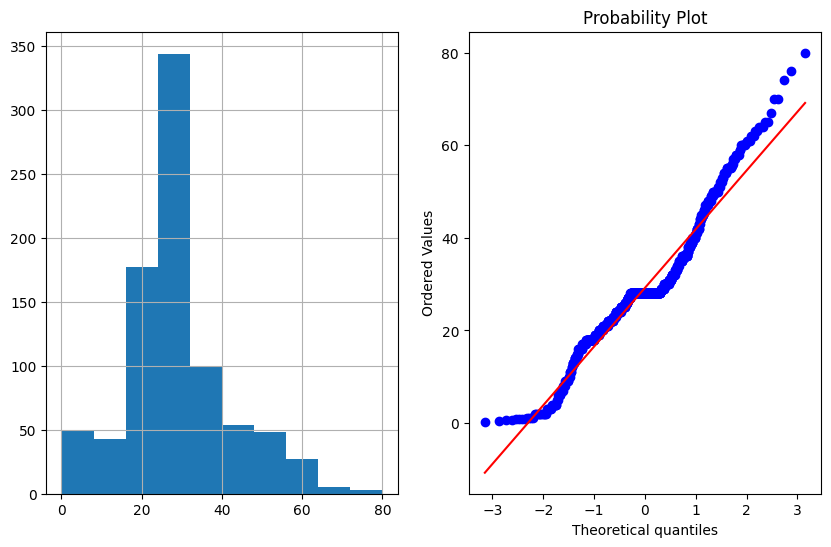

In [42]:
plot_data(df,'age')

#The x axis is the given parameter in the QQ plot, if they form a straight line, we can say the
#parameter is normally distributed

# Logarithmic Transformation

- This technique works well when the data is skewed, it converts the data to gaussian distribution

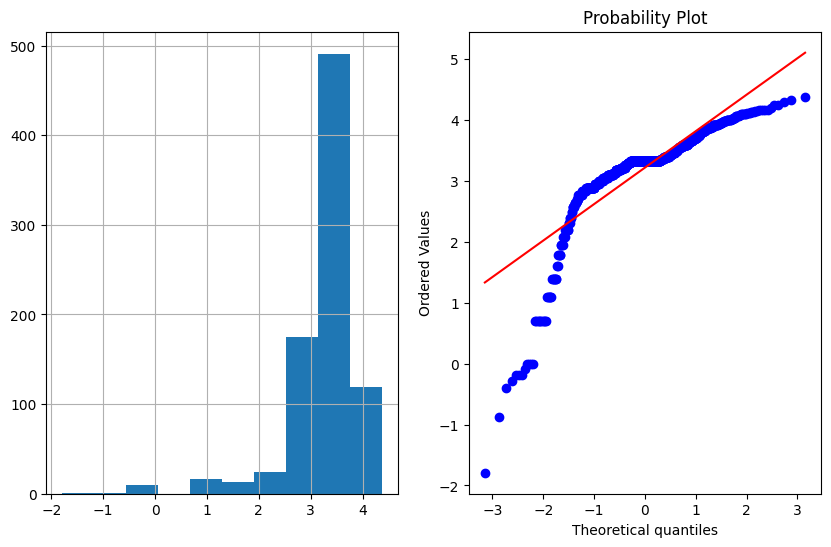

In [43]:
import numpy as np
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

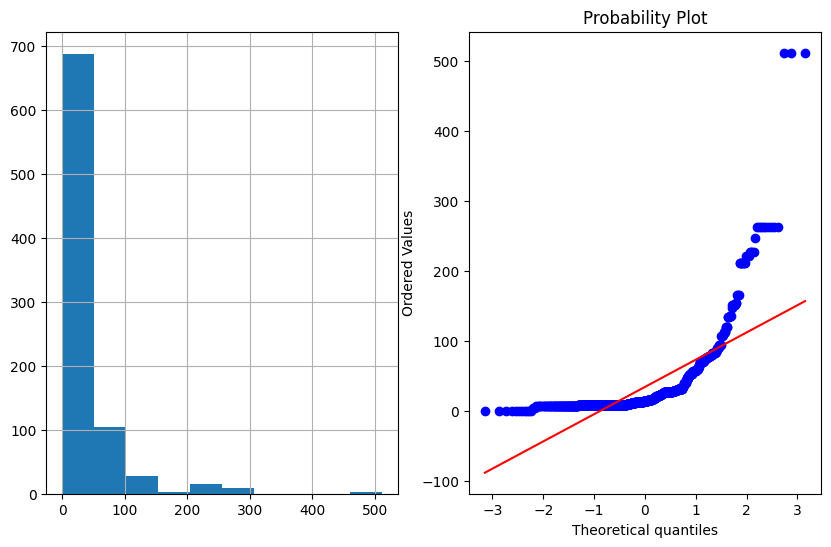

In [44]:
plot_data(df,'fare')

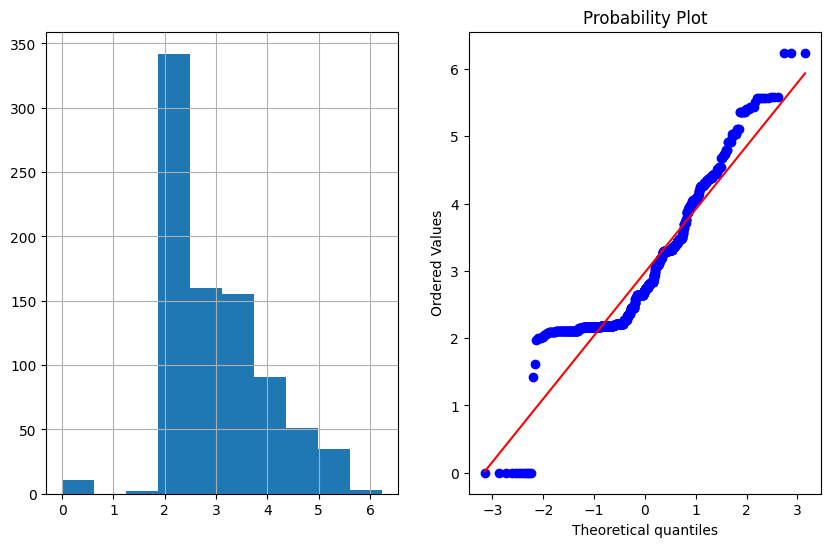

In [54]:
df['fare_log']=np.log1p(df['fare']) #Value of log 1+x, so we don't get an error with zero values
plot_data(df,'fare_log')

# Reciprocal Transformation

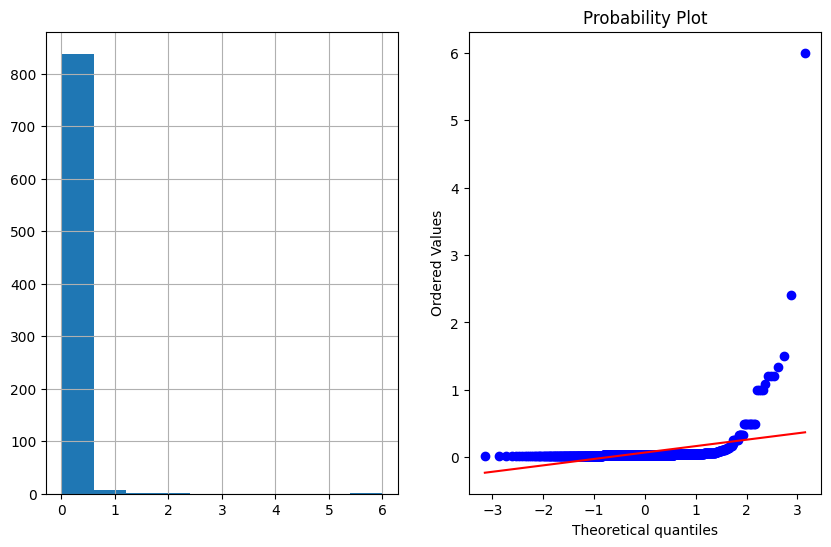

In [46]:
df['age_reciprocal']=1/df.age
plot_data(df,'age_reciprocal')

# Square Root Transformation

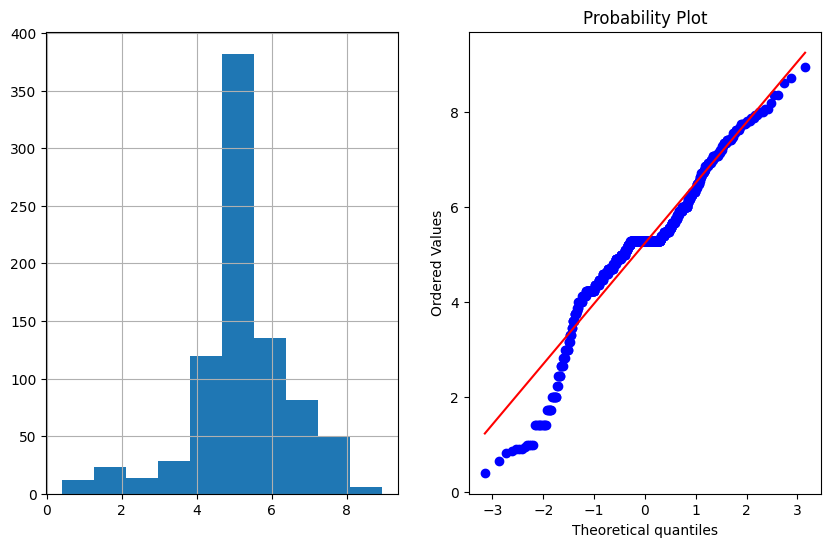

In [47]:
df['age_square']=df.age**(1/2)
plot_data(df,'age_square')

#This straight line signifies that the square root transformation has worked 
#i.e. converted to a gaussian distribution

# Exponential Transformation

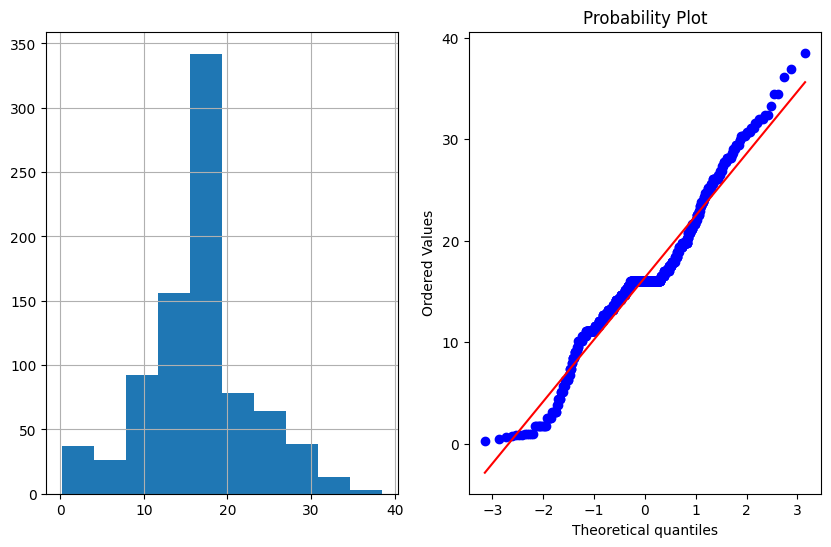

In [49]:
df['age_exponential']=df.age**(1/1.2) #Formula
plot_data(df,'age_exponential')

# BoxCox Transformation

Formula on wikipedia

In [ ]:
df['age_boxcox'],parameter=stat.boxcox(df['age'])

In [52]:
print(parameter)

0.7706329165332146


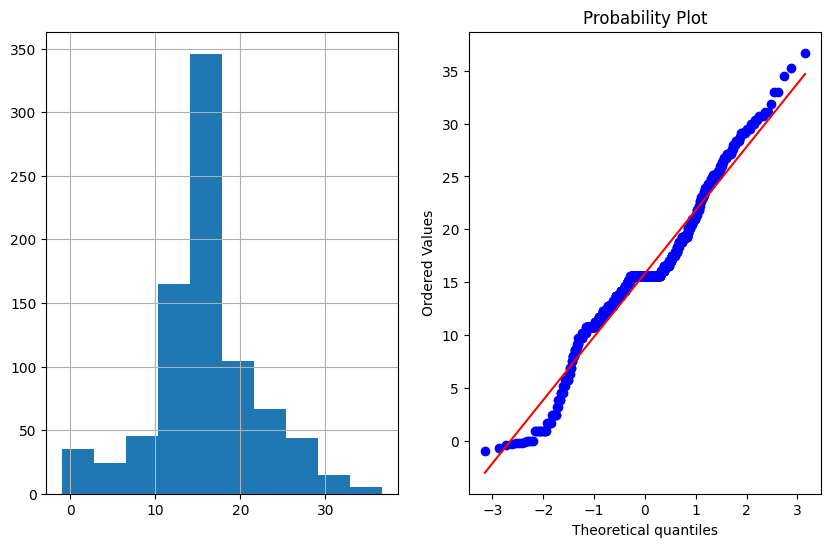

In [53]:
plot_data(df,'age_boxcox')

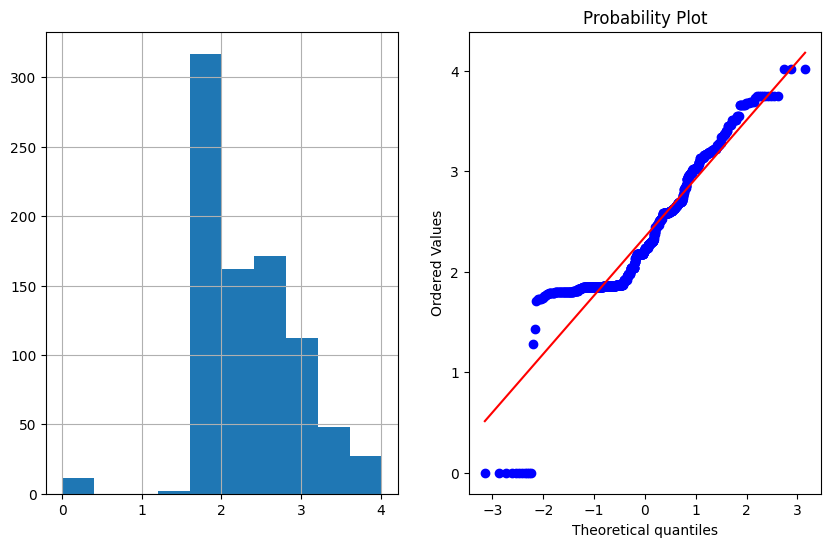

In [55]:
df['fare_boxcox'],parameter=stat.boxcox(df['fare']+1) # plus one because we had negative values and would have got an error
plot_data(df,'fare_boxcox')